In [1]:
import ast
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

#Loading dataset 
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_ind_da=df[(df['job_country']=="India")&(df['job_title_short']=='Data Analyst')].copy()


In [3]:
df_ind_da['job_posted_month']=df_ind_da['job_posted_date'].dt.month

In [4]:
df_da_ind_explode=df_ind_da.explode('job_skills')

In [5]:
df_da_total=df_ind_da.groupby('job_posted_month').size()

In [6]:
df_ind_da_pivot=df_da_ind_explode.pivot_table(index='job_posted_month',columns='job_skills',aggfunc='size',fill_value=0)

In [7]:
df_ind_da_pivot.loc['Total']=df_ind_da_pivot.sum()
df_ind_da_pivot=df_ind_da_pivot[df_ind_da_pivot.loc['Total'].sort_values(ascending=False).index]
df_ind_da_pivot=df_ind_da_pivot.drop('Total')
df_ind_da_pivot

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,0,0,0,1,0,0,0,0,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,1,0,0,0,0,0,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,1,0,0,0,0,0,1,0,0
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,1
7,245,161,174,124,93,67,78,39,31,31,...,0,0,0,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,1,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_da_ind_perc=df_ind_da_pivot.div(df_da_total/100,axis=0)
df_da_ind_perc

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.000000,0.000000,0.000000,0.159236,0.000000,0.0,0.000000,0.000000,0.00000
2,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
3,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.236967,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
4,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
5,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.359712,0.000000,0.000000,0.000000,0.000000,0.0,0.359712,0.000000,0.00000
6,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.27248
7,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
8,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.161812,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
9,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000


In [9]:
df_da_ind_perc = df_da_ind_perc.reset_index()
df_da_ind_perc['job_posted_month_name'] = df_da_ind_perc['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_da_ind_perc = df_da_ind_perc.set_index('job_posted_month_name')
df_da_ind_perc = df_da_ind_perc.drop(columns='job_posted_month')

In [13]:
df_da_ind_perc

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
job_posted_month_name,,,,,,,,,,,,,,,,,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.000000,0.000000,0.000000,0.159236,0.000000,0.0,0.000000,0.000000,0.00000
Feb,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Mar,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.236967,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Apr,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
May,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.359712,0.000000,0.000000,0.000000,0.000000,0.0,0.359712,0.000000,0.00000
Jun,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.27248
Jul,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Aug,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.161812,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Sep,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000


In [19]:
df_trend_plot=df_da_ind_perc.iloc[:,:6]
df_trend_plot

job_skills,sql,python,excel,tableau,power bi,r
job_posted_month_name,,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975
Feb,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441
Mar,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076
Apr,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129
May,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914
Jun,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447
Jul,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832
Aug,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977
Sep,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016


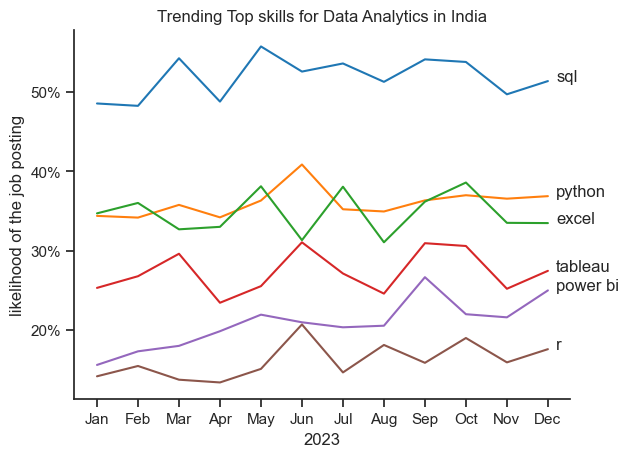

In [39]:
sns.set_theme(style='ticks')
sns.lineplot(data=df_trend_plot,legend=False,dashes=False,palette='tab10')
plt.title('Trending Top skills for Data Analytics in India')
plt.ylabel('likelihood of the job posting')
plt.xlabel('2023')
sns.despine()
from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(6):
    plt.text(11.2,df_trend_plot.iloc[-1,i],df_trend_plot.columns[i])